# What this file does

It joins datasets of 1) absentee ballots processed by party affiliation by town for 2020, 2) Population by town and 3) COVID cases, hospitalizations and deaths by town (current as of Sept 27)

# Preliminary Findings

- The average number of absentee ballots per town is 1144. West Hartford and Norwalk top the list with over 10,000 AB ballots.
- Approx 3x Dems registered to vote by Absentee Ballot when compared to Republicans; 2x Independents
- COVID cases and deaths, when expressed as a rate of the population, barely correlate with absentee ballots when expressed as a rate of the population. When you don't adjust voting or COVID spread by population you do see a correlation, but that's driven by the population. 




# Further work

Questions:
- Rosenberg says that this data is pulled of the Connecticut Voter Registration System, so towns are required to input this data as they process applications. Towns that haven't processed any absentee ballots are generally smaller, but I want to call the larger ones in the sample and figure out if they're dealing with backlogs
- Need to express Democratic and Republican use of Absentee Ballots are % of Registered Voters in each party by town to properly compare them. Asked Rosenberg for this data
- Absentee Ballot voting not being linked to COVID spread — even though they're easier to access bc of COVID — suggests that party affiliation is actually what's driving uptake of AB voting in various towns. Can do this analysis when I get the data from Rosenberg
- Trends in Republican/Democratic control of town?

In [1]:
import pandas as pd

# Data reading and cleaning

In [2]:
df = pd.read_excel('ABs Processed by Town and by Party as of 9-28.xlsx')

In [41]:
df.columns

Index(['Town Name ', 'ABs Processed for Registered Democrats',
       'ABs Processed for Registered Republicans',
       'ABs Processed for Registered Unaffiliated Voters',
       'ABs Processed for  Voters Registered in Other Parties',
       'Total ABs Processed'],
      dtype='object')

In [ ]:
df['Town Name'] = df['Town Name '].str.strip()

# Absentee Ballots Processed by Town

<AxesSubplot:>

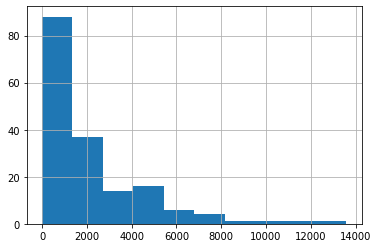

In [11]:
df['Total ABs Processed'].drop(169).hist()

In [114]:
df['Total ABs Processed'].drop(169).median()

1144.0

In [143]:
df.drop(169).sort_values(by='Total ABs Processed', ascending=False).head(10)

,Town Name,ABs Processed for Registered Democrats,ABs Processed for Registered Republicans,ABs Processed for Registered Unaffiliated Voters,ABs Processed for Voters Registered in Other Parties,Total ABs Processed,Town Name,Death_rate_per_100000
154,West Hartford,8351,1489,3584,164,13588,West Hartford,214.404828
102,Norwalk,5858,1460,3700,229,11247,Norwalk,166.636642
50,Fairfield,4725,1796,3320,135,9976,Fairfield,233.701346
134,Stamford,5165,1295,2512,187,9159,Stamford,155.818510
61,Hamden,5044,596,2069,74,7783,Hamden,237.796420
83,Milford,3489,1176,2946,132,7743,Milford,164.392569
33,Danbury,3372,1158,2572,132,7234,Danbury,145.228706
150,Waterbury,3960,831,2139,102,7032,Waterbury,161.758144
53,Glastonbury,3185,1093,2269,69,6616,Glastonbury,237.805232
76,Manchester,3422,762,1863,101,6148,Manchester,184.078911


# COVID data

In [14]:
df_2 = pd.read_csv('COVID-19_Tests__Cases__and_Deaths__By_Town_.csv')

In [17]:
df_Sept27 = df_2[df_2['Last update date']=='09/27/2020']

In [83]:
df_Sept27['Total cases '].sum()

57000

In [35]:
df_covid = df_Sept27[['Total cases ','Case rate','Total deaths','Town']]

In [57]:
df_final = df_covid.merge(df, left_on='Town', right_on='Town Name')

<AxesSubplot:xlabel='Total ABs Processed', ylabel='Total cases '>

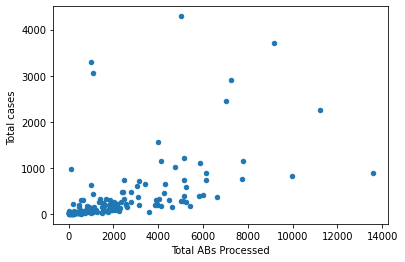

In [60]:
df_final.plot(y='Total cases ', x='Total ABs Processed', kind='scatter')

In [72]:
df_final['Total cases '][df_final['Total ABs Processed']>0].corr(df['Total ABs Processed'])

0.519100244851777

<AxesSubplot:xlabel='Total ABs Processed', ylabel='Total deaths'>

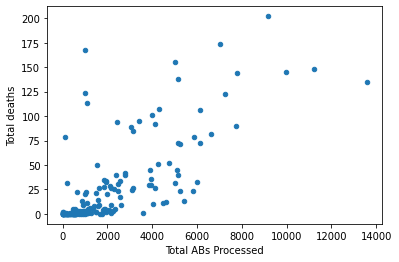

In [62]:
df_final.plot(y='Total deaths', x='Total ABs Processed', kind='scatter')

<AxesSubplot:xlabel='Total ABs Processed', ylabel='Total deaths'>

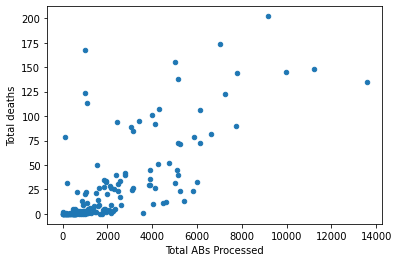

In [68]:
df_final[df_final['Total ABs Processed']>0].plot(y='Total deaths', x='Total ABs Processed', kind='scatter')

In [65]:
df_final['Total deaths'].corr(df['Total ABs Processed'])

0.6511709592102711

In [69]:
df_final[df_final['Total ABs Processed']>0]['Total deaths'].corr(df['Total ABs Processed'])

0.6440612901206262

<AxesSubplot:xlabel='Total ABs Processed', ylabel='Case rate'>

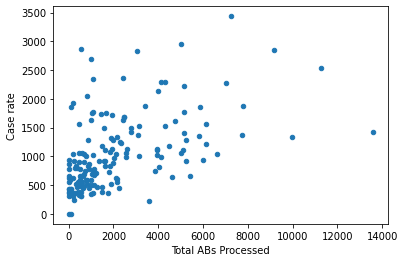

In [66]:
df_final.plot(y='Case rate', x='Total ABs Processed', kind='scatter')

In [67]:
df_final['Case rate'].corr(df['Total ABs Processed'])

0.5225759909708498

# Population data

In [95]:
df_pop = pd.read_csv('population_2019.csv')

In [99]:
df_final = df_pop.merge(df_final)

In [103]:
df_final['Population'] = df_final['Population'].str.replace(',','').astype(int)

In [109]:
df_final['Death_rate_per_100000'] = 100000*df_final['Total deaths']/df_final['Population']

<AxesSubplot:xlabel='Total ABs Processed', ylabel='Population'>

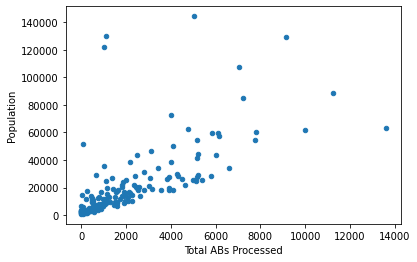

In [112]:
df_final.plot(y='Population', x='Total ABs Processed', kind='scatter')

In [128]:
df_final['Population'].corr(df_final['Total ABs Processed'])

0.6791817808021627

In [125]:
df_final['Total_ABs_per_100000']=100000*df_final['Total ABs Processed']/df_final['Population']

In [130]:
df_final['Death_rate_per_100000'].corr(df_final['Total_ABs_per_100000'])

0.28142436526082976

In [132]:
df_final['Case rate'].corr(df_final['Total_ABs_per_100000'])

-0.033279185483109534

<AxesSubplot:xlabel='Total ABs Processed', ylabel='Population'>

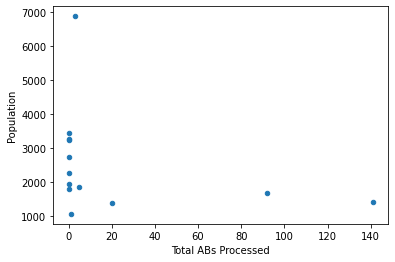

In [137]:
df_final[(df_final['ABs Processed for Registered Republicans']==0)|(df_final['ABs Processed for Registered Democrats']==0)|(df_final['ABs Processed for Registered Unaffiliated Voters']==0)|(df_final['ABs Processed for  Voters Registered in Other Parties']==0)|(df_final['Total ABs Processed']==0)].plot(y='Population', x='Total ABs Processed', kind='scatter')



In [141]:
df_final[(df_final['ABs Processed for Registered Republicans']==0)|(df_final['ABs Processed for Registered Democrats']==0)|(df_final['ABs Processed for Registered Unaffiliated Voters']==0)|(df_final['ABs Processed for  Voters Registered in Other Parties']==0)|(df_final['Total ABs Processed']==0)].sort_values(by='Population', ascending=False)

,Town,Population,Total cases,Case rate,Total deaths,Town Name,ABs Processed for Registered Democrats,ABs Processed for Registered Republicans,ABs Processed for Registered Unaffiliated Voters,ABs Processed for Voters Registered in Other Parties,Total ABs Processed,Town Name,Death_rate_per_100000,Total_ABs_per_100000
153,Westbrook,6869,38,550.0,0,Westbrook,0,2,1,0,3,Westbrook,0.000000,43.674480
149,Washington,3428,30,874.0,2,Washington,0,0,0,0,0,Washington,58.343057,0.000000
99,North Canaan,3251,12,369.0,1,North Canaan,0,0,0,0,0,North Canaan,30.759766,0.000000
0,Andover,3236,10,310.0,0,Andover,0,0,0,0,0,Andover,0.000000,0.000000
12,Bozrah,2726,16,631.0,1,Bozrah,0,0,0,0,0,Bozrah,36.683786,0.000000
86,Morris,2254,15,663.0,0,Morris,0,0,0,0,0,Morris,0.000000,0.000000
52,Franklin,1920,18,931.0,0,Franklin,0,0,0,0,0,Franklin,0.000000,0.000000
62,Hampton,1842,8,432.0,0,Hampton,4,0,1,0,5,Hampton,0.000000,271.444083
38,Eastford,1790,14,782.0,1,Eastford,0,0,0,0,0,Eastford,55.865922,0.000000
122,Scotland,1672,0,0.0,0,Scotland,41,19,32,0,92,Scotland,0.000000,5502.392344


In [147]:
df_final[df_final['Total ABs Processed']<100].sort_values(by='Population', ascending=False)


,Town,Population,Total cases,Case rate,Total deaths,Town Name,ABs Processed for Registered Democrats,ABs Processed for Registered Republicans,ABs Processed for Registered Unaffiliated Voters,ABs Processed for Voters Registered in Other Parties,Total ABs Processed,Town Name,Death_rate_per_100000,Total_ABs_per_100000
137,Stratford,51849,966,1859.0,79,Stratford,50,8,35,1,94,Stratford,152.365523,181.295686
71,Ledyard,14621,56,380.0,2,Ledyard,11,12,9,1,33,Ledyard,13.678955,225.702756
153,Westbrook,6869,38,550.0,0,Westbrook,0,2,1,0,3,Westbrook,0.000000,43.674480
159,Willington,5864,25,425.0,0,Willington,40,14,31,2,87,Willington,0.000000,1483.628922
149,Washington,3428,30,874.0,2,Washington,0,0,0,0,0,Washington,58.343057,0.000000
99,North Canaan,3251,12,369.0,1,North Canaan,0,0,0,0,0,North Canaan,30.759766,0.000000
0,Andover,3236,10,310.0,0,Andover,0,0,0,0,0,Andover,0.000000,0.000000
12,Bozrah,2726,16,631.0,1,Bozrah,0,0,0,0,0,Bozrah,36.683786,0.000000
86,Morris,2254,15,663.0,0,Morris,0,0,0,0,0,Morris,0.000000,0.000000
52,Franklin,1920,18,931.0,0,Franklin,0,0,0,0,0,Franklin,0.000000,0.000000
